<a href="https://colab.research.google.com/github/Ostrich2002/SRiSHTi23/blob/main/SRISHTI'23_assignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import math
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [2]:
# Simple 2D example
x_1 = np.array((1, 2))
x_2 = np.array((4, 6))

In [3]:
# Naive approach to calculating Euclidean distance (not-vectorized)
sumv = 0
for i in range(len(x_1)):
  sumv += ((x_1[i]-x_2[i])**2)
dist = math.sqrt(sumv)
print(dist)

5.0


In [8]:
euclidean_dist = np.sqrt(np.sum((x_1-x_2)**2))
print(euclidean_dist)

5.0


In [4]:
euclidean_dist = distance.euclidean(x_1, x_2)
print(euclidean_dist)

5.0


In [5]:
# 3-D Visualization
plotx = np.linspace(-10,10,50)
meshx, meshy = np.meshgrid(plotx,plotx)

In [6]:
tempeuclid = np.sqrt((meshx**2 + meshy**2))

In [7]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=tempeuclid, x=plotx, y=plotx)])
fig.update_layout(title='Euclidean Distance from origin', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [9]:
#Manhattan distance

# Libraries such as SciPy provide functions to compute different kinds of distance metrics between points
# x_1 = np.array((1, 2))
# x_2 = np.array((4, 6))
manhattan_dist = distance.cityblock(x_1, x_2)
print(manhattan_dist)

7


In [10]:
manhattan_dist = np.sum(np.abs((x_1 - x_2)))
print(manhattan_dist)

7


In [11]:
# 3-D visualization
plotx = np.linspace(-10,10,50)
meshx, meshy = np.meshgrid(plotx,plotx)

In [12]:
tempmanhattan = np.abs(meshx) + np.abs(meshy)

In [13]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=tempmanhattan, x=plotx, y=plotx)])
fig.update_layout(title='Manhattan Distance from origin', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

KNN

In [14]:
import random
import scipy.stats as ss
from sklearn.neighbors import KNeighborsClassifier

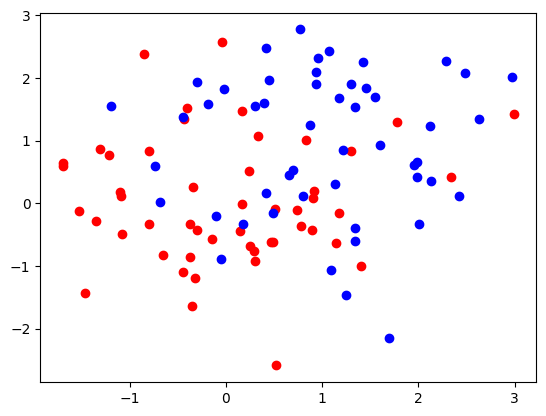

In [15]:
def generate_synth_data(n = 50):
    points = np.concatenate((ss.norm(0, 1).rvs((n, 2)), ss.norm(1, 1).rvs((n, 2))), axis = 0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)

n = 50
pts,tgts = generate_synth_data(n) #generates 100 points
# print(tgts)
plt.figure()
plt.plot(pts[:n, 0], pts[:n, 1], "ro")
plt.plot(pts[n:, 0], pts[n:, 1], "bo")
plt.show()

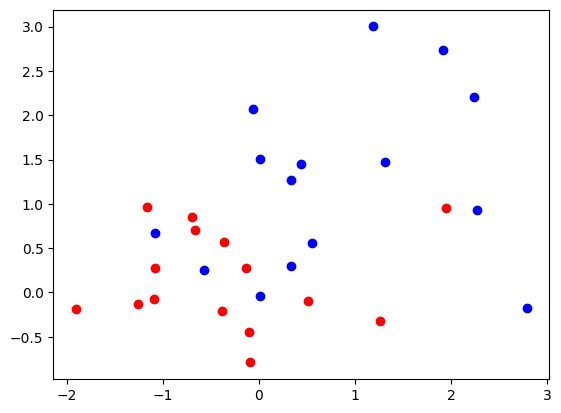

In [16]:
n = 15
test_pts,test_tgts = generate_synth_data(n)
# print(test_tgts)
plt.figure()
plt.plot(test_pts[:n, 0], test_pts[:n, 1], "ro")
plt.plot(test_pts[n:, 0], test_pts[n:, 1], "bo")
plt.show()

In [20]:
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')


In [21]:
knn = KNeighborsClassifier(n_neighbors=3, metric='chebyshev')


In [22]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
# data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
data['target'] = pd.Series(iris.target)
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [23]:
np.random.seed(123)
indices = np.random.permutation(data.shape[0])
div = int(0.65 * len(indices))
train_idx, test_idx = indices[:div], indices[div:]

train_set, test_set = data.loc[train_idx,:], data.loc[test_idx,:]
test_class = list(test_set.iloc[:,-1])
train_class = list(train_set.iloc[:,-1])

In [24]:
def dist_euclidean(X1,X2):           
    return distance.euclidean(X1,X2)

In [25]:
def dist_cosine(X1,X2):           
    return distance.cosine(X1,X2)

In [26]:
def dist_manhattan(X1,X2):           
    return distance.cityblock(X1,X2)

In [27]:
def dist_chebyshev(X1,X2):           
    return distance.chebyshev(X1,X2)

In [28]:
metrics_list = [dist_euclidean,dist_cosine, dist_manhattan, dist_chebyshev]
for dist_metric in metrics_list:
  knn = KNeighborsClassifier(n_neighbors = 3, metric=dist_metric)
  knn.fit(train_set, train_class)
  our_predictions = knn.predict(test_set)
  print(dist_metric.__name__)
  print("Prediction Accuracy: ")
  print(100 * np.mean(our_predictions == test_class))
  print()

dist_euclidean
Prediction Accuracy: 
100.0

dist_cosine
Prediction Accuracy: 
100.0

dist_manhattan
Prediction Accuracy: 
100.0

dist_chebyshev
Prediction Accuracy: 
100.0



#Questions
Similarity measures how alike two objects or data points are. Higher similarity indicates greater resemblance or proximity between the points. Similarity measures can take various forms, such as correlation coefficients, cosine similarity, or overlap measures. In KNN, similarity is often used indirectly by considering the inverse of the distance as a measure of similarity. That is, the closer two points are, the more similar they are considered.

Distance measures the dissimilarity or separation between two objects or data points. Lower distance indicates greater dissimilarity or distance between the points. Distance measures quantify the extent of dissimilarity using various mathematical formulas.

Conditions for a distance metric to be considered a "distance metric," there are a few properties that must hold:

Non-negativity: The distance between any two points should be non-negative. That is, for any points A and B, the distance d(A, B) should be greater than or equal to zero.

Identity of indiscernibles: The distance between two points should be zero if and only if the points are identical. In other words, if A and B are the same point, then d(A, B) = 0.

Symmetry: The distance between A and B should be the same as the distance between B and A. In mathematical terms, d(A, B) = d(B, A).

Triangle inequality: The distance between A and B plus the distance between B and C should be greater than or equal to the distance between A and C. In mathematical terms, d(A, B) + d(B, C) ≥ d(A, C).